In [1]:
import sys
sys.path.append('./models/results')
import matplotlib.pyplot as plt
import numpy as np
import dida_caps_not_clean, dida_spinal_not_clean, historical_spinal_not_clean, historical_caps_not_clean

labels = ['baseline', 'standard', 'binarize']
folder_path = './imgs/char_results_plots/'
plt.rcParams.update({'font.size': 28})

def plot_character_accuracy(accuracy_dicts, labels, title= "", file_name="test"):

    save_path = folder_path + file_name

    if len(accuracy_dicts) != len(labels):
        raise ValueError("The number of dictionaries and labels must be the same.")
    
    sorted_data = []
    for accuracy_dict in accuracy_dicts:
        sorted_data.append(dict(sorted(accuracy_dict.items())))

    characters = list(sorted_data[0].keys()) 
    accuracies = [list(data.values()) for data in sorted_data]
    y_limit = max(max(acc) for acc in accuracies) * 1.1

    bar_width = 0.2
    x_positions = np.arange(len(characters))

    plt.figure(figsize=(14, 7))
    for i, acc in enumerate(accuracies):
        plt.bar(x_positions + i * bar_width, acc, bar_width, label=labels[i])
    
    plt.title(title)
    plt.xlabel("")
    plt.ylabel("Accuracy")
    plt.ylim(0, y_limit)
    plt.xticks(x_positions + (len(accuracy_dicts) - 1) * bar_width / 2, characters, rotation=0)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

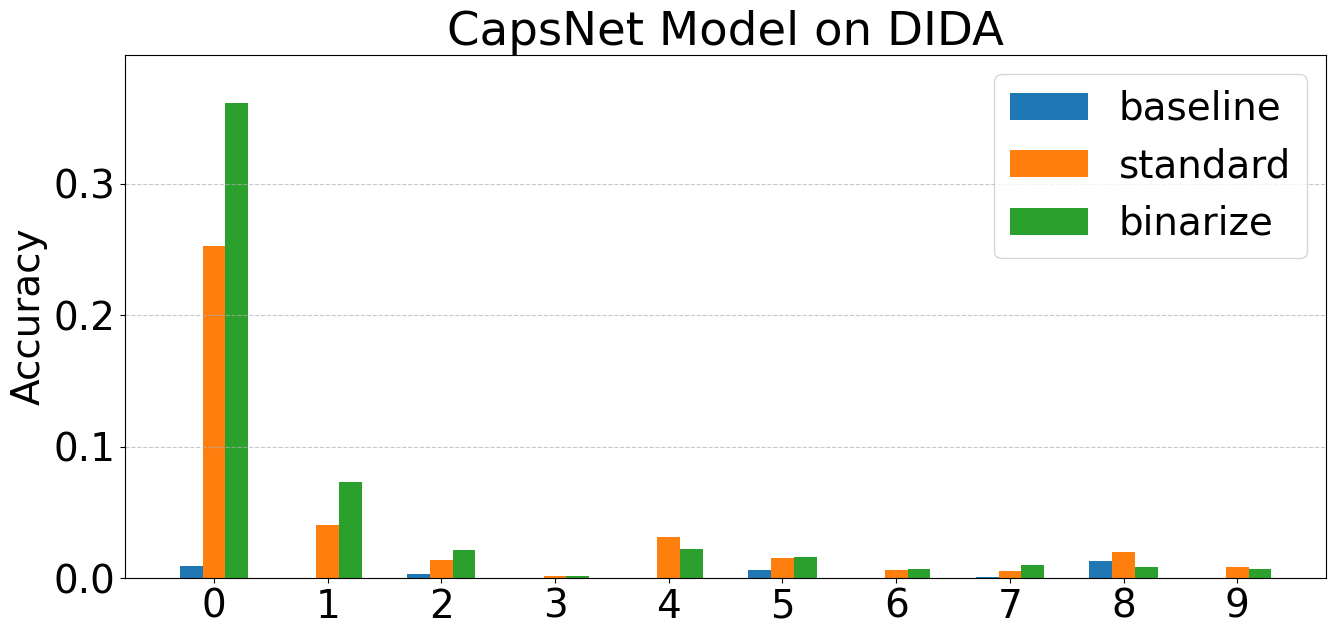

In [38]:
plot_character_accuracy(
    accuracy_dicts= [dida_caps_not_clean.raw, 
     dida_caps_not_clean.roi, 
     dida_caps_not_clean.binary], 
    labels= labels, 
    title= "CapsNet Model on DIDA", 
    file_name= "dida_caps_not_clean")

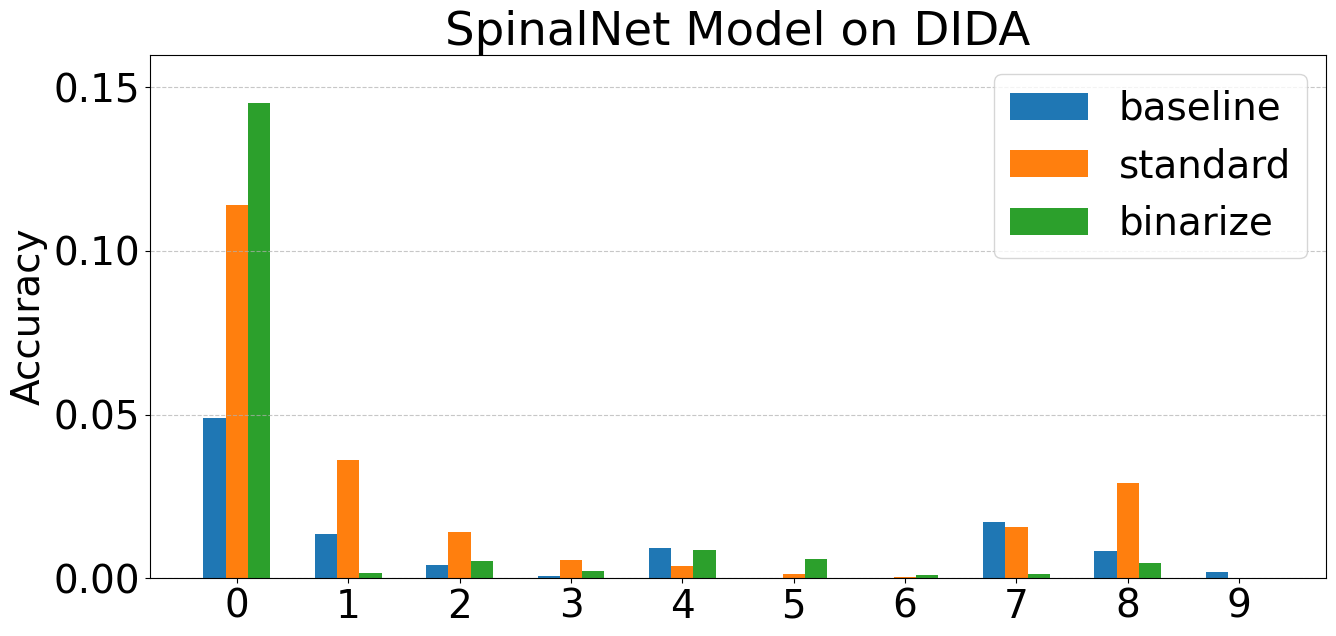

In [39]:
plot_character_accuracy(
    accuracy_dicts= [dida_spinal_not_clean.raw, 
     dida_spinal_not_clean.roi, 
     dida_spinal_not_clean.binary], 
    labels= labels, 
    title="SpinalNet Model on DIDA", 
    file_name="dida_spinal_not_clean")

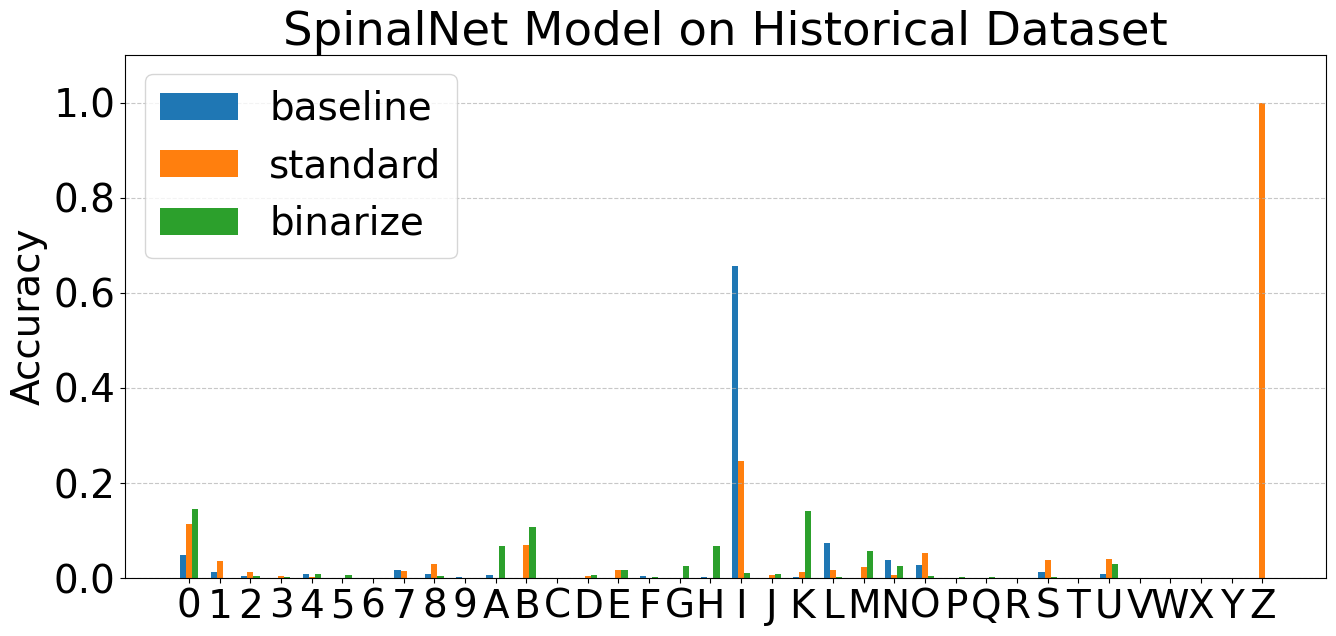

In [40]:
plot_character_accuracy(
    accuracy_dicts= [historical_spinal_not_clean.raw, 
     historical_spinal_not_clean.roi, 
     historical_spinal_not_clean.binary], 
    labels= labels, 
    title="SpinalNet Model on Historical Dataset", 
    file_name="historical_spinal_not_clean")

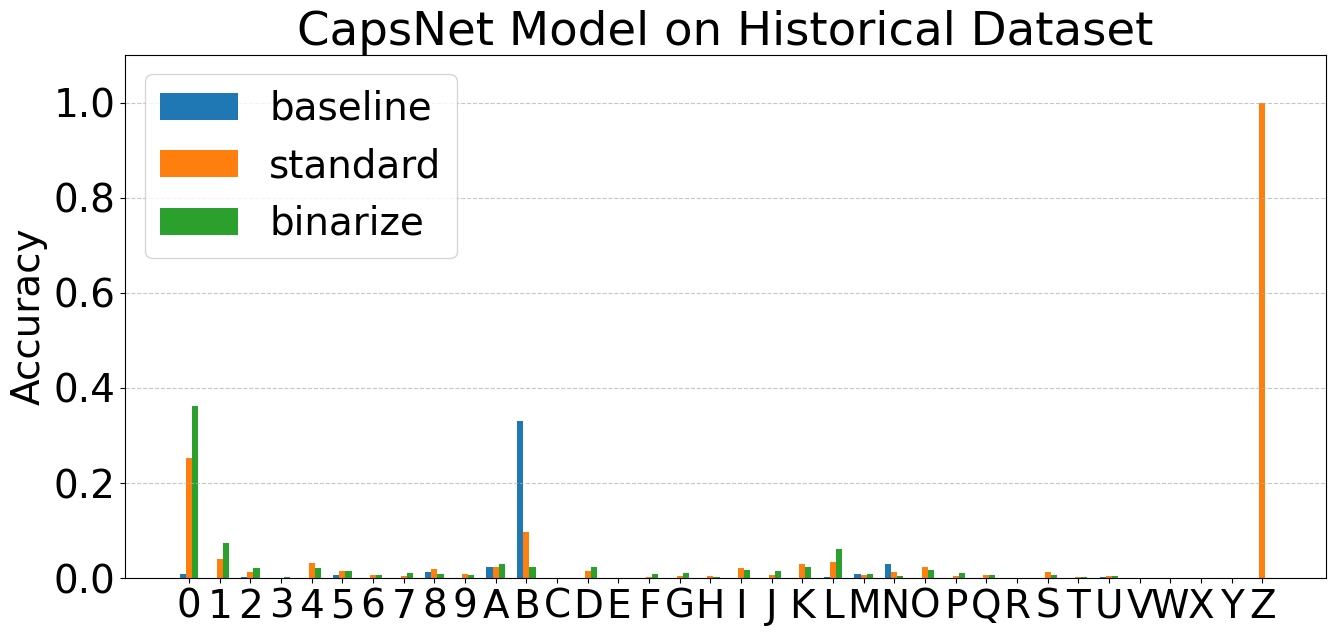

In [41]:
plot_character_accuracy(
    accuracy_dicts= [historical_caps_not_clean.raw, 
     historical_caps_not_clean.roi, 
     historical_caps_not_clean.binary], 
    labels= labels, 
    title="CapsNet Model on Historical Dataset", 
    file_name="historical_caps_not_clean")